<a href="https://colab.research.google.com/github/Dannydejesus/Alura-Store_Latam/blob/main/Copia_de_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

import warnings
warnings.filterwarnings('ignore')


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [33]:
def facturacion(f):
    ingresoTotal = f['Precio'].sum()
    return ingresoTotal

facturacion_tienda1 = facturacion(tienda)
facturacion_tienda2 = facturacion(tienda2)
facturacion_tienda3 = facturacion(tienda3)
facturacion_tienda4 = facturacion(tienda4)

print("Resumen de facturación por tienda:\n")
print(f"Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4: ${facturacion_tienda4:,.2f}")

facturaciones = {
    "Tienda 1": facturacion_tienda1,
    "Tienda 2": facturacion_tienda2,
    "Tienda 3": facturacion_tienda3,
    "Tienda 4": facturacion_tienda4
                }

tienda_mas_factura = max(facturaciones, key=facturaciones.get)
print(f"\nLa tienda con mayor facturación es: {tienda_mas_factura} con ${facturaciones[tienda_mas_factura]:,.2f}")

Resumen de facturación por tienda:

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

La tienda con mayor facturación es: Tienda 1 con $1,150,880,400.00


#2. Ventas por Categoria

In [34]:
def listarCategoria(lc):
    categorias = []
    for categoria in lc['Categoría del Producto']:
        if categoria not in categorias:
            categorias.append(categoria)
    return categorias

def totalCategoria(tc):
    categorias = listarCategoria(tc)
    conteo = {}

    for cat in categorias:
        contador = 0
        for i in range(len(tc)):
            if tc['Categoría del Producto'][i] == cat:
                contador += 1
        conteo[cat] = contador

    return conteo

def popularCategoria(pc):
    categoriasConteo = totalCategoria(pc)
    maxCantidad = -1
    categoriaPopular = None

    for cat, cantidad in categoriasConteo.items():
        if cantidad > maxCantidad:
            maxCantidad = cantidad
            categoriaPopular = cat

    return categoriaPopular

def mostrarResultados(tienda, nombre_tienda):
    print(f"Resultados para {nombre_tienda}:\n")
    print(f"Categorías disponibles: {listarCategoria(tienda)}\n")
    print("Total de ventas por categoría:")
    for categoria, total in totalCategoria(tienda).items():
        print(f"  - {categoria}: {total} ventas")
    print(f"\nCategoría más popular: {popularCategoria(tienda)}\n")
    print("-" * 40)

mostrarResultados(tienda, "Tienda 1")
mostrarResultados(tienda2, "Tienda 2")
mostrarResultados(tienda3, "Tienda 3")
mostrarResultados(tienda4, "Tienda 4")

Resultados para Tienda 1:

Categorías disponibles: ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Artículos para el hogar', 'Deportes y diversión', 'Libros', 'Instrumentos musicales']

Total de ventas por categoría:
  - Electrónicos: 448 ventas
  - Muebles: 465 ventas
  - Juguetes: 324 ventas
  - Electrodomésticos: 312 ventas
  - Artículos para el hogar: 171 ventas
  - Deportes y diversión: 284 ventas
  - Libros: 173 ventas
  - Instrumentos musicales: 182 ventas

Categoría más popular: Muebles

----------------------------------------
Resultados para Tienda 2:

Categorías disponibles: ['Muebles', 'Instrumentos musicales', 'Deportes y diversión', 'Electrónicos', 'Artículos para el hogar', 'Juguetes', 'Electrodomésticos', 'Libros']

Total de ventas por categoría:
  - Muebles: 442 ventas
  - Instrumentos musicales: 224 ventas
  - Deportes y diversión: 275 ventas
  - Electrónicos: 422 ventas
  - Artículos para el hogar: 181 ventas
  - Juguetes: 313 ventas
  - Electrodoméstic

# 3. Calificación promedio de la tienda

In [35]:
def totalCalificacion(tcf):
    calificacionTotal = tcf['Calificación'].sum()
    return calificacionTotal

def promedioCalificacion(pcf):
    calificacionTotal = totalCalificacion(pcf)
    promedio = calificacionTotal / len(pcf)
    return round(promedio, 2)

def mostrarCalificaciones(tienda, nombre_tienda):
    total = totalCalificacion(tienda)
    promedio = promedioCalificacion(tienda)
    print(f"Resultados para {nombre_tienda}:\n")
    print(f"  - Total de puntos: {total}")
    print(f"  - Promedio de calificación: {promedio}\n")
    print("-" * 40)

mostrarCalificaciones(tienda, "Tienda 1")
mostrarCalificaciones(tienda2, "Tienda 2")
mostrarCalificaciones(tienda3, "Tienda 3")
mostrarCalificaciones(tienda4, "Tienda 4")

Resultados para Tienda 1:

  - Total de puntos: 9381
  - Promedio de calificación: 3.98

----------------------------------------
Resultados para Tienda 2:

  - Total de puntos: 9524
  - Promedio de calificación: 4.04

----------------------------------------
Resultados para Tienda 3:

  - Total de puntos: 9550
  - Promedio de calificación: 4.05

----------------------------------------
Resultados para Tienda 4:

  - Total de puntos: 9422
  - Promedio de calificación: 4.0

----------------------------------------


# 4. Productos más y menos vendidos

In [36]:
def productosValorados(pv):
    categoriasValor = totalCategoria(pv)
    maxCantidad = -1
    categoriaPopular = None

    for cat, cantidad in categoriasValor.items():
        if cantidad > maxCantidad:
            maxCantidad = cantidad
            categoriaPopular = cat

    return [categoriaPopular, maxCantidad]


def productosMenosValorados(pmv):
    categoriasValor = totalCategoria(pmv)
    minCantidad = float('inf')  # Usar infinito para inicializar el mínimo
    categoriaMenosPopular = None

    for cat, cantidad in categoriasValor.items():
        if cantidad < minCantidad:
            minCantidad = cantidad
            categoriaMenosPopular = cat

    return [categoriaMenosPopular, minCantidad]


# Mostrar resultados de forma ordenada
def mostrarProductosValorados(tienda, nombre_tienda):
    mas_valorado = productosValorados(tienda)
    menos_valorado = productosMenosValorados(tienda)

    print(f"Resultados para {nombre_tienda}:\n")
    print(f"  - Producto más valorado: {mas_valorado[0]} con {mas_valorado[1]} valoraciones")
    print(f"  - Producto menos valorado: {menos_valorado[0]} con {menos_valorado[1]} valoraciones\n")
    print("-" * 40)


# Llamar a la función para cada tienda
mostrarProductosValorados(tienda, "Tienda 1")
mostrarProductosValorados(tienda2, "Tienda 2")
mostrarProductosValorados(tienda3, "Tienda 3")
mostrarProductosValorados(tienda4, "Tienda 4")

Resultados para Tienda 1:

  - Producto más valorado: Muebles con 465 valoraciones
  - Producto menos valorado: Artículos para el hogar con 171 valoraciones

----------------------------------------
Resultados para Tienda 2:

  - Producto más valorado: Muebles con 442 valoraciones
  - Producto menos valorado: Artículos para el hogar con 181 valoraciones

----------------------------------------
Resultados para Tienda 3:

  - Producto más valorado: Muebles con 499 valoraciones
  - Producto menos valorado: Instrumentos musicales con 177 valoraciones

----------------------------------------
Resultados para Tienda 4:

  - Producto más valorado: Muebles con 480 valoraciones
  - Producto menos valorado: Instrumentos musicales con 170 valoraciones

----------------------------------------


# 5. Envío promedio por tienda

In [37]:
def totalEnvio(te):
    enviosTotal = te['Costo de envío'].sum()
    return enviosTotal

def promedioEnvio(pe):
    envioTotal = totalEnvio(pe)
    promedioEntrega = envioTotal / len(pe)
    return round(promedioEntrega, 2)

# Mostrar resultados de forma ordenada
def mostrarEnvios(tienda, nombre_tienda):
    total = totalEnvio(tienda)
    promedio = promedioEnvio(tienda)
    print(f"Resultados para {nombre_tienda}:\n")
    print(f"  - Total de envío: ${total:,.2f}")
    print(f"  - Promedio de envío: ${promedio:,.2f}\n")
    print("-" * 40)

# Llamar a la función para cada tienda
mostrarEnvios(tienda, "Tienda 1")
mostrarEnvios(tienda2, "Tienda 2")
mostrarEnvios(tienda3, "Tienda 3")
mostrarEnvios(tienda4, "Tienda 4")

Resultados para Tienda 1:

  - Total de envío: $61,377,900.00
  - Promedio de envío: $26,018.61

----------------------------------------
Resultados para Tienda 2:

  - Total de envío: $59,485,100.00
  - Promedio de envío: $25,216.24

----------------------------------------
Resultados para Tienda 3:

  - Total de envío: $58,516,600.00
  - Promedio de envío: $24,805.68

----------------------------------------
Resultados para Tienda 4:

  - Total de envío: $55,317,400.00
  - Promedio de envío: $23,459.46

----------------------------------------


# 6. Graficos Matplotlib

In [38]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

### Facturacion total por Tienda

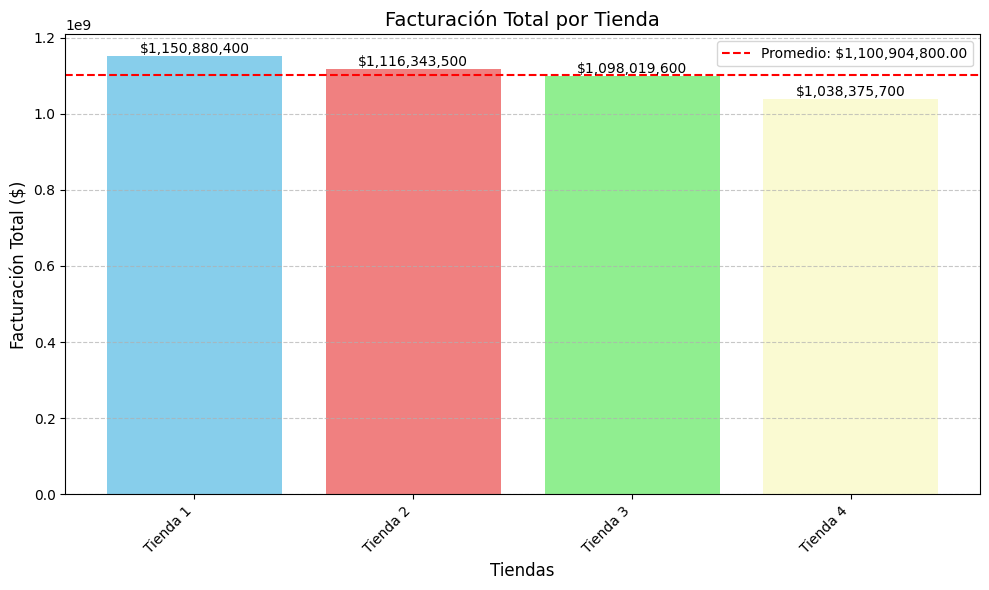

In [39]:
facturaciones = {
    "Tienda 1": facturacion_tienda1,
    "Tienda 2": facturacion_tienda2,
    "Tienda 3": facturacion_tienda3,
    "Tienda 4": facturacion_tienda4
}

tiendas = list(facturaciones.keys())
facturacion_valores = list(facturaciones.values())

promedio_facturacion = sum(facturacion_valores) / len(facturacion_valores)

plt.figure(figsize=(10, 6))
plt.bar(tiendas, facturacion_valores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightgoldenrodyellow'])
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Facturación Total ($)", fontsize=12)
plt.title("Facturación Total por Tienda", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(facturacion_valores):
    plt.text(i, v + 500, f"${v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.axhline(y=promedio_facturacion, color='red', linestyle='--', label=f'Promedio: ${promedio_facturacion:,.2f}')
plt.legend()

plt.tight_layout()
plt.show()


### Ventas por categoria y tienda

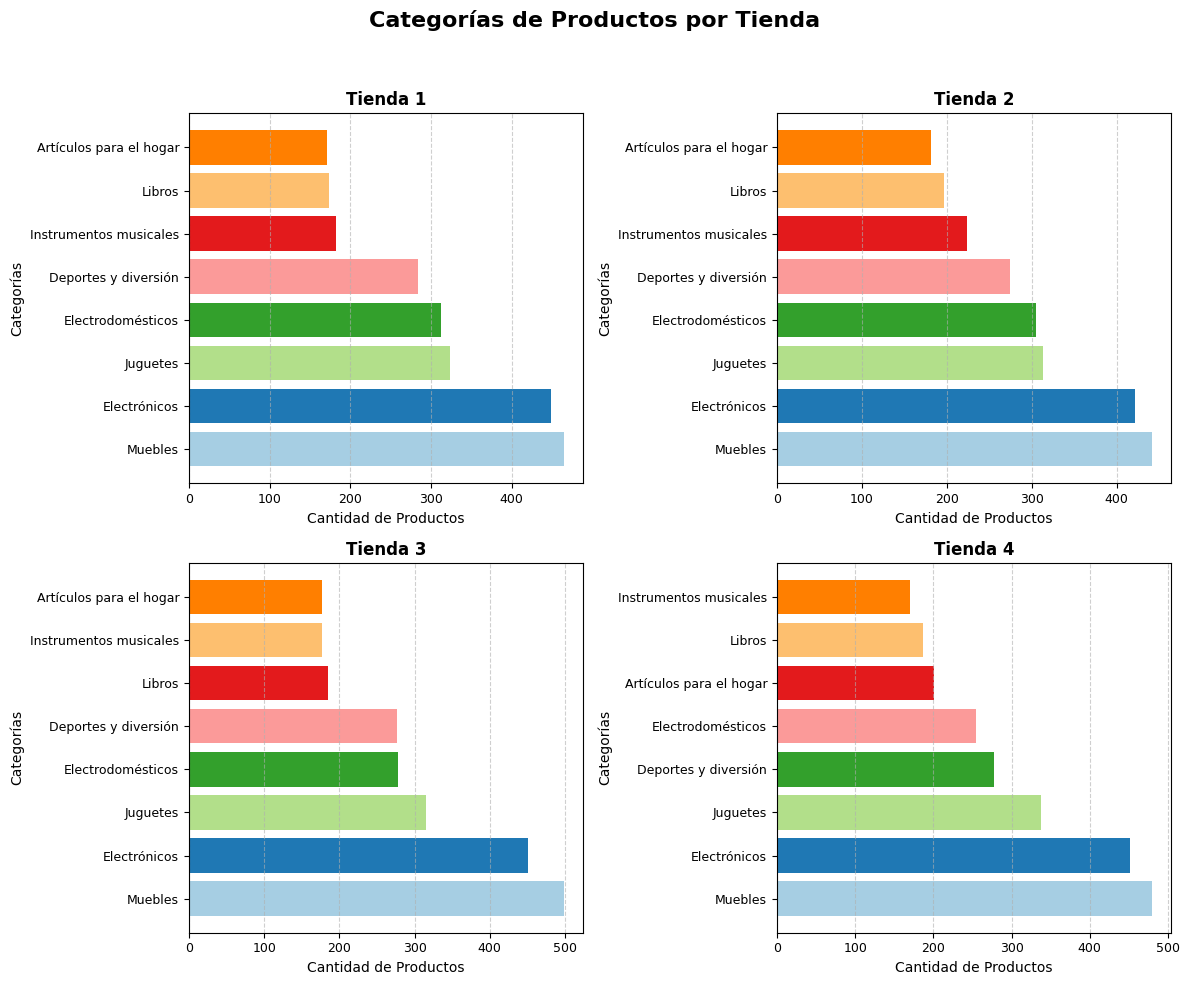

In [45]:
def grafico_barras_categorias(tienda, nombre_tienda, ax):
    categorias = tienda['Categoría del Producto'].value_counts()

    ax.barh(categorias.index, categorias.values, color=plt.cm.Paired.colors)
    ax.set_title(nombre_tienda, fontsize=12, fontweight='bold')
    ax.set_xlabel('Cantidad de Productos', fontsize=10)
    ax.set_ylabel('Categorías', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

grafico_barras_categorias(tienda, "Tienda 1", axes[0, 0])
grafico_barras_categorias(tienda2, "Tienda 2", axes[0, 1])
grafico_barras_categorias(tienda3, "Tienda 3", axes[1, 0])
grafico_barras_categorias(tienda4, "Tienda 4", axes[1, 1])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

fig.suptitle('Categorías de Productos por Tienda', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Costo promedio por tienda

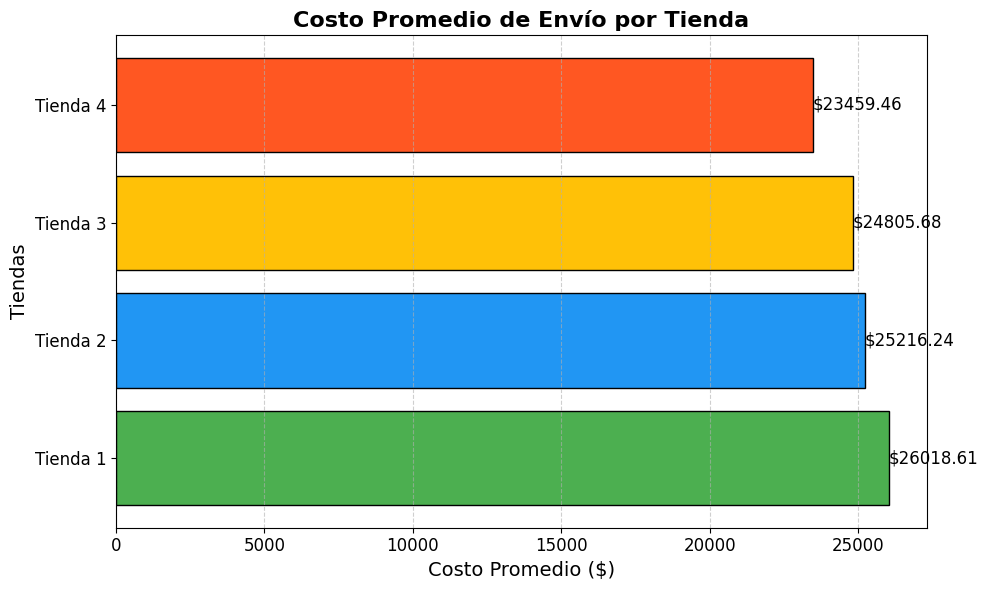

In [46]:
promedios_envio = {
    "Tienda 1": promedioEnvio(tienda),
    "Tienda 2": promedioEnvio(tienda2),
    "Tienda 3": promedioEnvio(tienda3),
    "Tienda 4": promedioEnvio(tienda4)
}

nombres_tiendas = list(promedios_envio.keys())
costos_promedio = list(promedios_envio.values())

plt.figure(figsize=(10, 6))
colores = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722']
plt.barh(nombres_tiendas, costos_promedio, color=colores, edgecolor='black')

plt.title("Costo Promedio de Envío por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Costo Promedio ($)", fontsize=14)
plt.ylabel("Tiendas", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(costos_promedio):
    plt.text(v + 0.1, i, f"${v:.2f}", va='center', fontsize=12, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Promedio calificacion de tiendas

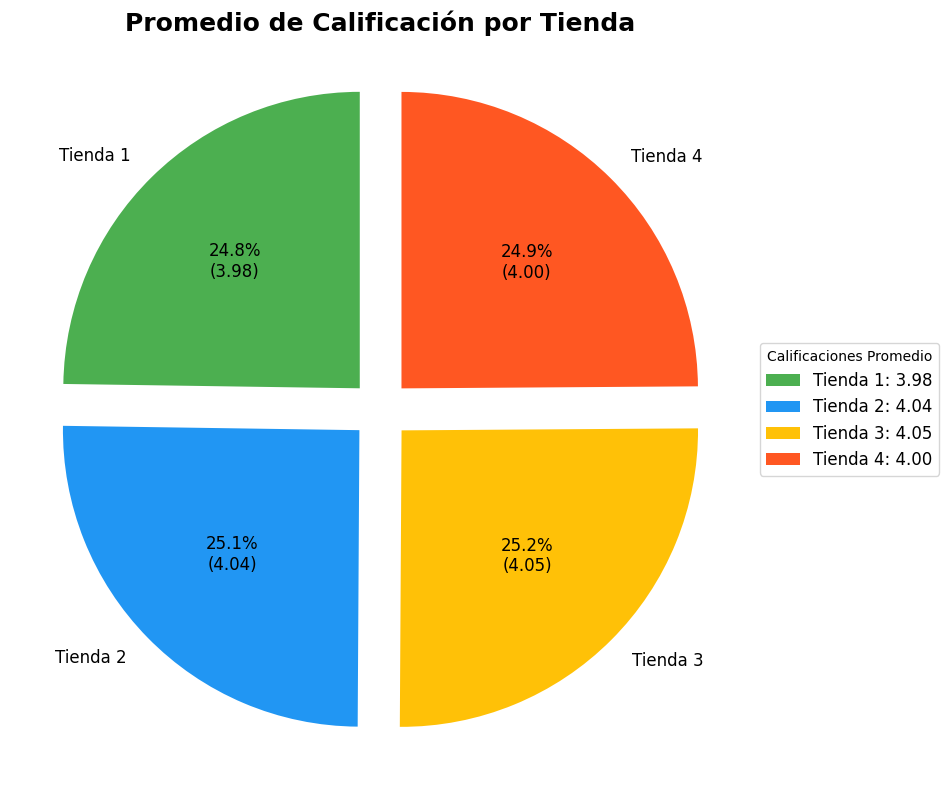

In [43]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [promedioCalificacion(tienda) for tienda in tiendas]
colores = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722']
plt.figure(figsize=(10, 8))
plt.title('Promedio de Calificación por Tienda', fontsize=18, fontweight='bold')
plt.pie(
    promedios,
    labels=nombres_tiendas,
    colors=colores,
    autopct=lambda p: f"{p:.1f}%\n({p * sum(promedios) / 100:.2f})",
    startangle=90,
    explode=(0.1, 0.1, 0.1, 0.1),
    textprops={'fontsize': 12, 'color': 'black'}
)

leyenda = [f"{nombre}: {promedio:.2f}" for nombre, promedio in zip(nombres_tiendas, promedios)]
plt.legend(leyenda, title="Calificaciones Promedio", bbox_to_anchor=(1, 0.5), loc='center left', fontsize=12)

plt.tight_layout()
plt.show()

#7. Informe final